In [ ]:
import numpy as np
import pandas as pd
import time
import random

## Q1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans1. For matrix multiplication of the matrix A(n,k) and B(k,m), we need to perform n * k * m multiplications in total. For each row of matrix A, we need to multiply it with the first column of matrix B which will lead to k multiplications. For each row, we need to consider each and every column for multiplication so k * m multiplications. We need to consider each row, therefore total of n * k * m multiplications.

For additions, the answer should be n * (k - 1) * m. For each row multiplied with its column there will be (k - 1) additions in between. The rest explaination for n * m remains the same. 

## Q2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [41]:
# First generate 2 random matrices which we will use for further computation
import random

# Change the value according to your requirements
global n,k,m
n = 97
k = 99
m = 80

np.random.seed(42)
A = np.random.randint(0,10, size=(n,k))
B = np.random.randint(0,10, size=(k,m))

# If you want to print matrix, uncomment below code
# for a in A:
#     print(a)
# print("\n")

# for b in B:
#     print(b)
# print("\n")


In [47]:
# By list calculation 
%%timeit -n 10
result = [[ 0 for i in range(n)] for j in range(n)]

# start_time = time.time();
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]

# If you want to print matrix, uncomment below code
# for r in result: 
#   print(r)
  

# print("\n")
# print("The time taken is", time.time() - start_time)
# t1 =  time.time() - start_time

571 ms ± 57.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
# By numpy inbuilt function for multiplication
%%timeit -n 10
# start_time = time.time();
C = np.matmul(A, B)
# If you want to print matrix, uncomment below code
# for c in C:
  # print(c)

# print("\n")
# print("The time taken is", time.time() - start_time)
# t2 =  time.time() - start_time

999 µs ± 489 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
# We can clearly see that the numpy built-in function takes less time than the normal function. Therefore built-in function 
# for matrix multiplication is faster.

## Q3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [52]:
import time
import numpy as np

In [60]:
arr = np.array([1, 15, 24, 99, 22, 2, 5, 3, 56, 54, 65, 55, 87, 76])

# Finding median by sorting method
def getMedian(arr):
    arr.sort()    
    # print(arr)
        
    size = len(arr)
    mid = (size - 1)//2
    if(size % 2 != 0):
        return arr[mid]
    else:
        return (arr[mid] + arr[mid + 1])/2.0

def getMedianUsingMax(arr):
    n = len(arr)
    while(len / 2 >= 0):
      ans = findMax(arr)
    if(len % 2 != 0){
        return ans
    }



In [64]:
%%timeit -n 10

# Get median in O(n logn) time 
getMedian(arr)

The slowest run took 12.22 times longer than the fastest. This could mean that an intermediate result is being cached.
14.4 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [65]:
%%timeit -n 10
arr = np.array([1, 15, 24, 99, 22, 2, 5, 3, 56, 54, 65, 55, 87, 76])

# Get median in O(1) time
# Using numpy function median
# start_time2 = time.time()
np.median(arr)
# t2 = time.time() - start_time2
# print(time.time() - start_time2,"seconds for built-in function")

The slowest run took 5.76 times longer than the fastest. This could mean that an intermediate result is being cached.
66.2 µs ± 57.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
# The results obtained shows the sorting method to be faster than the inbuilt median function.

## Q4 What is the gradient of the following function with respect to x and y?

Ans 4.For the function f(x) = (x^2)y + (y^3)sin(x). Gradient of the function wrt x will be the partial differentiation wrt x which will be 2xy + (y^3)cos(x).
For calculating gradient wrt y, the answer would be (x^2) + 3 (y^2)sin(x).

Gradient of  f(x) = (x^2)y + (y^3)sin(x) = [2xy + (y^3)cos(x),x^2) + 3 (y^2)sin(x) ]

\begin{align*}
\nabla f &= \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} \\
&= \begin{bmatrix} \frac{\partial}{\partial x} (x^2y + y^3\sin(x)) \\ \frac{\partial}{\partial y} (x^2y + y^3\sin(x)) \end{bmatrix} \\
&= \begin{bmatrix} 2xy + y^3\cos(x) \\ x^2 + 3y^2\sin(x) \end{bmatrix}
\end{align*}


## Q5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [69]:
import jax
import jax.numpy as jnp
import random

In [70]:
def f(x, y):
    return x**2*y + y**3*jnp.sin(x)

def calculatedGrad(x, y):
  return jnp.array([2*x*y + y**3*jnp.cos(x), x**2 + 3*y**2*jnp.sin(x)])


df_dx = jax.grad(f, argnums=0)

df_dy = jax.grad(f, argnums=1)


x = random.random()
y = random.random()

print("The gradient wrt x using JAX is ",df_dx(x, y))
print("The gradient wrt y using JAX is", df_dy(x, y))

print("The gradient calculated analytically is: ", calculatedGrad(x, y))


The gradient wrt x using JAX is  0.19371438
The gradient wrt y using JAX is 0.07144639
The gradient calculated analytically is:  [0.19371438 0.07144639]


## Q6 Use sympy to confirm that you obtain the same gradient analytically.

In [23]:
import sympy
from sympy.vector import gradient
from sympy import symbols

In [24]:
#Symbols
x, y = symbols('x,y')
# Function
f = x * x * y + y * y * y*sympy.sin(x)

In [28]:
print("Partial diff. wrt x",f.diff(x))

print("Partial diff. wrt y",f.diff(y))

Partial diff. wrt x 2*x*y + y**3*cos(x)
Partial diff. wrt y x**2 + 3*y**2*sin(x)


## Q7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [71]:
# Ans7

nd = {
    "2022" : {
    "Branch1":{
        "1":{"Roll Number": 20110156,"Name": "Rahul", "Marks":{
            "Maths": 100, "English": 70,
        }},
        "2":{
            "Roll Number": 201101111,"Name": "Rohan", "Marks":{
            "Maths": 10, "English": 90
        }
        },
        "3":{
            "Roll Number": 201119432,"Name": "Raj", "Marks":{
            "Maths": 30, "English": 90,
        }
        },
    },
    "Branch2":{}
},
2023:{
    "Branch1":{},
    "Branch2":{}
},
2024:{
    "Branch1":{},
    "Branch2":{}
},
2025:{
    "Branch1":{},
    "Branch2":{}
},}


## Q8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [74]:
class Database:
  def __init__(self):
      self.years = []

class Year:
  def __init__(self):
    self.branches = []

class Branch:
  def __init__(self):
    self.students = []

class Student:
  def __init__(self, name, rollno, marks):
    self.name = name
    self.rollno = rollno
    self.marks = marks

# Object creation
s = Student("Rahul", '20110156', {'Maths': 100, 'English': 100})


## Q9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0.5, 100, 0.5)
# print(x)

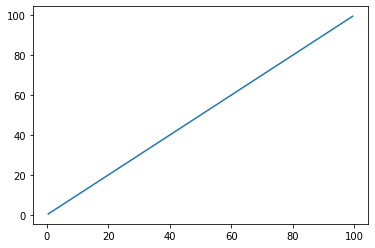

In [49]:
y = x

plt.plot(x,y)

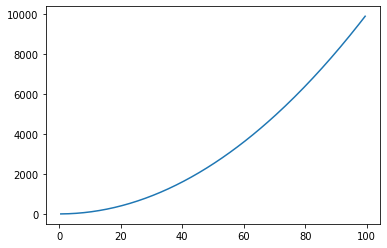

In [50]:
y = pow(x, 2)
plt.plot(x, y)

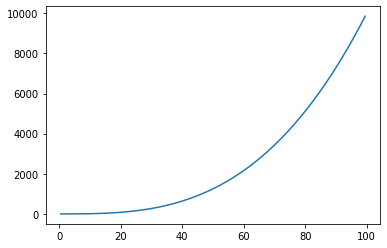

In [51]:
y = (pow(x, 3)/100)
plt.plot(x, y)

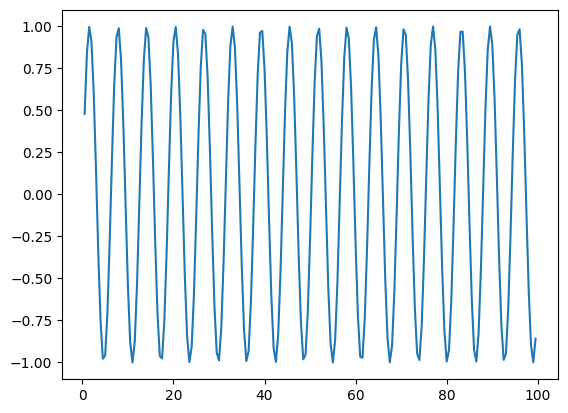

In [ ]:
y = np.sin(x)
plt.plot(x, y)

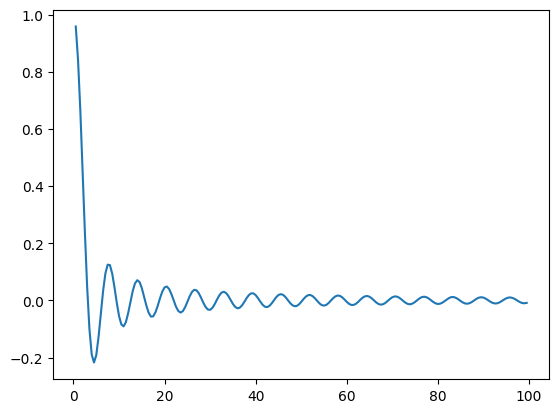

In [ ]:
y = np.sin(x)/x
plt.plot(x, y)

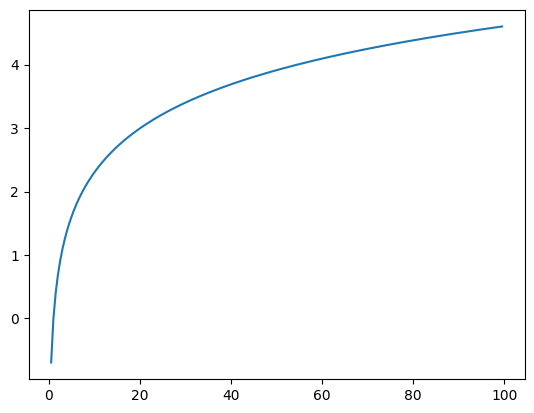

In [ ]:
y = np.log(x)
plt.plot(x, y)

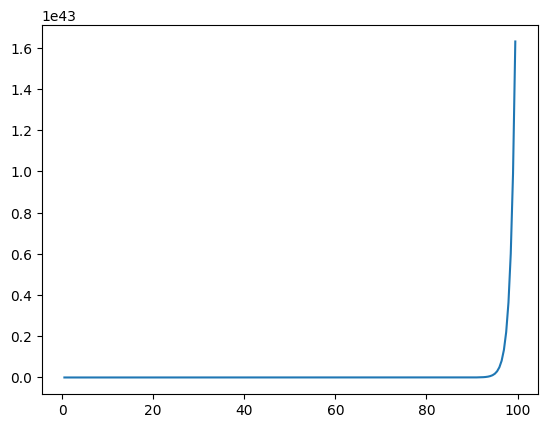

In [ ]:
y = np.exp(x)
plt.plot(x, y)

## Q10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [79]:
m = np.random.uniform(1, 2, size = (20, 5))
# print(m)

print('')
print('Get a dataframe out of the matrix m',"\n")

df = pd.DataFrame(m, columns = ['a', 'b', 'c', 'd', 'e'])
print(df)
print('\n')

# Find standard deviation of each column using .std() and fine the maximum among all of them using max.
# print(df.std())
print(df.std().idxmax())
print('\n')

# Row with lowest mean
# print(df.mean(axis = 1))
print(df.mean(axis = 1).idxmin())
print('\n')


Get a dataframe out of the matrix m 

           a         b         c         d         e
0   1.366015  1.304070  1.008555  1.833608  1.087433
1   1.630755  1.504075  1.526689  1.926713  1.031615
2   1.773392  1.052052  1.038154  1.429818  1.063075
3   1.789144  1.529563  1.029039  1.040501  1.612669
4   1.806112  1.437800  1.554581  1.799829  1.610506
5   1.224760  1.613052  1.628279  1.734107  1.620874
6   1.969242  1.197288  1.951091  1.538339  1.671956
7   1.099462  1.380576  1.769379  1.706911  1.040139
8   1.546594  1.088278  1.995856  1.897297  1.021081
9   1.858650  1.919430  1.353548  1.719502  1.442104
10  1.655232  1.340317  1.322559  1.424434  1.145568
11  1.831139  1.348698  1.400150  1.894055  1.496624
12  1.544254  1.956498  1.886726  1.169467  1.473215
13  1.971296  1.372366  1.371573  1.195030  1.114323
14  1.740305  1.770030  1.969013  1.773418  1.243352
15  1.040117  1.985437  1.340451  1.311972  1.905955
16  1.585100  1.214871  1.889096  1.993361  1.086679
17  1.8


## Q11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [16]:
# Created column f
df['f'] = df.sum(axis = 1)
print(df)

           a         b         c         d         e         f
0   1.508632  1.013135  1.521069  1.861722  1.160680  7.065237
1   1.767408  1.960792  1.557164  1.839847  1.295052  8.420263
2   1.381581  1.399013  1.048660  1.030909  1.947778  6.807942
3   1.157472  1.078500  1.874658  1.224270  1.496254  6.831154
4   1.131241  1.058088  1.251354  1.745694  1.792918  6.979296
5   1.527760  1.438549  1.959838  1.132631  1.622572  7.681350
6   1.827915  1.643984  1.963063  1.454133  1.482682  8.371778
7   1.476266  1.488803  1.578147  1.999254  1.298813  7.841282
8   1.708086  1.567343  1.059986  1.855108  1.844662  8.035185
9   1.750402  1.546698  1.416844  1.756562  1.577379  8.047886
10  1.831995  1.916626  1.635565  1.823446  1.278692  8.486324
11  1.649190  1.003340  1.667293  1.210212  1.837233  7.367269
12  1.075995  1.665406  1.610483  1.543886  1.670739  7.566509
13  1.477150  1.310423  1.662313  1.358849  1.274716  7.083451
14  1.929384  1.987495  1.517303  1.969550  1.245750  8

In [18]:
# Create coulumn g
def fun(num):
  if(num < 8):
    return "LT8"
  else:
    return "GT8"

newcolg = df['f'].apply(fun)

df['g'] = newcolg

print(df)

           a         b         c         d         e         f    g
0   1.508632  1.013135  1.521069  1.861722  1.160680  7.065237  LT8
1   1.767408  1.960792  1.557164  1.839847  1.295052  8.420263  GT8
2   1.381581  1.399013  1.048660  1.030909  1.947778  6.807942  LT8
3   1.157472  1.078500  1.874658  1.224270  1.496254  6.831154  LT8
4   1.131241  1.058088  1.251354  1.745694  1.792918  6.979296  LT8
5   1.527760  1.438549  1.959838  1.132631  1.622572  7.681350  LT8
6   1.827915  1.643984  1.963063  1.454133  1.482682  8.371778  GT8
7   1.476266  1.488803  1.578147  1.999254  1.298813  7.841282  LT8
8   1.708086  1.567343  1.059986  1.855108  1.844662  8.035185  GT8
9   1.750402  1.546698  1.416844  1.756562  1.577379  8.047886  GT8
10  1.831995  1.916626  1.635565  1.823446  1.278692  8.486324  GT8
11  1.649190  1.003340  1.667293  1.210212  1.837233  7.367269  LT8
12  1.075995  1.665406  1.610483  1.543886  1.670739  7.566509  LT8
13  1.477150  1.310423  1.662313  1.358849  1.27

In [19]:
#The number of rows in the dataframe where the value in the column “g” is “LT8”. 
num_rows = df['g'].value_counts()['LT8']
print(num_rows)

14


In [28]:
# Calculating Standard deviation for the column f with LT8 and GT8 in column g respectively
newdfwithLT8 = df[df['g'] == 'LT8']
newdfwithGT8 = df[df['g'] == 'GT8']

print("The standard deviation for the column f with LT8 only in g")
ans1 = newdfwithLT8['f'].std()
print(ans1)

print("The standard deviation for the column f with GT8 only in g")
ans2 = newdfwithGT8['f'].std()
print(ans2)

The standard deviation for the column f with LT8 only in g
0.3655521806054572
The standard deviation for the column f with GT8 only in g
0.2460662175703554


## Q12 Write a small piece of code to explain broadcasting in numpy.


In [80]:
# Broadcasting is the way to perform arthimetic operations on numpy arrays of different sizes by making it compatible with each other. The smaller sized
# matrix is broadcasted or made compatible with the matrix of larger size. For the below case, the 1* 3 matrix is made compatible to be added to the 3 * 3 matrix
# For eg:

# A is a 3 * 3 matrix 
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A,"\n")

# B is a 1 * 3 matrix
B = np.array([1,1,1])
print(B, "\n")

# The resulting matrix will be a 3 * 3 matrix with [1, 1, 1] being broadcasted into a 3 * 3 matrix.
C = A + B
print(C)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[1 1 1] 

[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


## Q13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.


In [ ]:
miniEleInd = 0
miniEle = 999999;
def computeMinEleInd(arr):
    mini = min(arr)
    for i in range(0, len(arr)):
        if(mini == arr[i]):
            miniEleInd = i
            break
    return miniEleInd



# Compute index of minimum element
arr = np.array([5, 10, 12, 15, 1, 6, 99, 4])
print(computeMinEleInd(arr))
# print(ComputeMin(arr))
print(np.argmin(arr))

4
4


In [81]:
# Therefore our function and the argmin function returns the minimum element index.